In [10]:
import geopandas as gpd
from shapely.ops import triangulate
import meshio

# Define the path to the shapefile
shapefile_path = './cb_2018_us_nation_20m/cb_2018_us_nation_20m.shp'

# Load the shapefile using GeoPandas
gdf = gpd.read_file(shapefile_path)

triangulated_mesh = []
print(gdf)
i=0
j=0
for geometry in gdf.geometry:
   if geometry.geom_type == 'Polygon':
      print("GOT A POLYGON", i, j)
      triangles = triangulate(geometry)
      triangulated_mesh.extend(triangles)
   elif geometry.geom_type == 'MultiPolygon':
      print("Got a MultiPolygon", i, j)
      for polygon in geometry.geoms:  # Iterate over the individual polygons
         # print(polygon , "Got inside the MultiPolygon loop", i, j)         
         triangles = triangulate(polygon)
         triangulated_mesh.extend(triangles)
         j=j+1
   i=i+1

# Create a new GeoDataFrame from the triangulated mesh
triangulated_gdf = gpd.GeoDataFrame(geometry=triangulated_mesh)
# print(triangulated_gdf)
# Save the triangulated mesh as a UGRID file
# output_path = './triangulated_mesh.ugrid'
# print(triangulated_mesh)


    AFFGEOID GEOID           NAME  \
0  0100000US    US  United States   

                                            geometry  
0  MULTIPOLYGON (((179.48132 51.97530, 179.58286 ...  
Got a MultiPolygon 0 0


Text(0.5, 1.0, 'Original Shapefile')

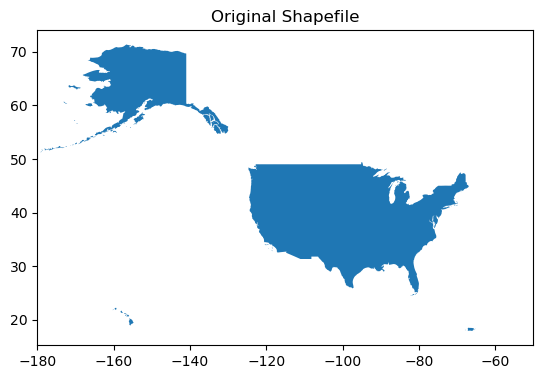

In [2]:
xmin, xmax = -180, -50

# Plot the shapefile
ax = gdf.plot()
ax.set_xlim(xmin, xmax)  # Use matplotlib's axis methods for more control
ax.set_title("Original Shapefile")

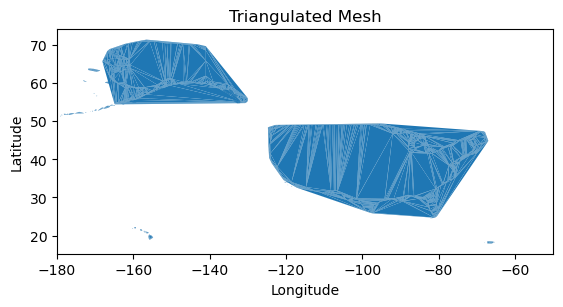

In [3]:
import matplotlib.pyplot as plt

# Plot the triangulated mesh
triangulated_gdf.plot()

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Triangulated Mesh')
# Set the x-axis range
x_min, x_max = -180, -50
plt.xlim(x_min, x_max) 

# Show the plot
plt.show()


In [4]:
# import matplotlib.pyplot as plt

# # Plot the triangulated mesh
# triangulated_gdf.plot()

# # Add labels and title
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Triangulated Mesh')

# # Set the x-axis range
# plt.xlim(x_min, x_max)  # Replace x_min and x_max with the desired range

# # Show the plot
# plt.show()


In [5]:
# shapefiles have two coordinate systems: geographic and projected

# Geographic Coordinate System (GCS): Uses spherical coordinates like latitude and longitude (degrees), typically ranging from -180° to 180° (longitude) and -90° to 90° (latitude).
# Projected Coordinate System (PCS): Uses flat, Cartesian coordinates like meters or feet. These are derived from GCS by applying a map projection to account for the Earth's curvature.
# NOTE: for the initial implementation, we will use the GCS and not read the .prj file

i=0
j=0
print("HERE")
import PythonCDT as cdt

def save_triangulation_as_off(t: cdt.Triangulation, off_file) -> None:
    with open(off_file, "w") as f:
        f.write(f"OFF\n")
        f.write(f"{t.vertices_count()} {t.triangles_count()} 0\n")
        for v in t.vertices_iter():
            f.write(f"{v.x} {v.y} 0\n")
        for tri in t.triangles_iter():
            vv = tri.vertices
            f.write(f"3 {int(vv[0])} {int(vv[1])} {int(vv[2])}\n")

t = cdt.Triangulation(cdt.VertexInsertionOrder.AS_PROVIDED, cdt.IntersectingConstraintEdges.IGNORE, 0.0)

first = [0.0,0.0]
print("Entering the loop")
for geometry in gdf.geometry:
   if geometry.geom_type == 'Polygon':
      print("GOT A POLYGON", i, j)
      # triangles = triangulate(geometry)
      # triangulated_mesh.extend(triangles)
   elif geometry.geom_type == 'MultiPolygon':
      print("Got a MultiPolygon", i, j)
      for polygon in geometry.geoms:  # Iterate over the individual polygons
         # if j == 3:
         #    print(polygon , "Got inside the MultiPolygon loop", i, j) 
         jj=0 
         count=0
         t = cdt.Triangulation(cdt.VertexInsertionOrder.AS_PROVIDED, cdt.IntersectingConstraintEdges.IGNORE, 0.0)

         vv = [cdt.V2d(coords[0], coords[1]) for coords in polygon.exterior.coords]
         ee = [cdt.Edge(i, i+1) for i in range(len(vv)-1)]
         # print(vv, type(vv))
         t.insert_vertices(vv)
         t.insert_edges(ee)
         # t.conform_to_edges(ee)

         file_name = "test"+str(j)+".off"
         save_triangulation_as_off(t, file_name)
         print("Saved file", file_name)
         
         
         # print(t.vertices, "number of vertices")
         print(len(t.vertices))
         for ii in list(polygon.exterior.coords):
            
            if jj == 0:
               first[0] = ii[0]
               first[1] = ii[1]
            
            if jj > 0:
               if ii[0] == first[0] and ii[1] == first[1]:
                  count+=1
                  if count > 1:
                     print("FOUND A HOLE MATCH", ii)
               # else:
                  # print("NO MATCH", ii, first)
            jj+=1
         
         # print(j, "HAS ", jj, "POINTS")
               
         # triangles = triangulate(polygon)
         # triangulated_mesh.extend(triangles)
         j=j+1
   i=i+1

HERE
Entering the loop
Got a MultiPolygon 0 0
Saved file test0.off
12
Saved file test1.off
17
Saved file test2.off
10
Saved file test3.off
9
Saved file test4.off
10
Saved file test5.off
23
Saved file test6.off
10
Saved file test7.off
15
Saved file test8.off
23
Saved file test9.off
10
Saved file test10.off
12
Saved file test11.off
115
Saved file test12.off
11
Saved file test13.off
9
Saved file test14.off
13
Saved file test15.off
17
Saved file test16.off
10
Saved file test17.off
8
Saved file test18.off
9
Saved file test19.off
19
Saved file test20.off
9
Saved file test21.off
9
Saved file test22.off
9
Saved file test23.off
12
Saved file test24.off
13
Saved file test25.off
11
Saved file test26.off
10
Saved file test27.off
24
Saved file test28.off
16
Saved file test29.off
13
Saved file test30.off
12
Saved file test31.off
10
Saved file test32.off
20
Saved file test33.off
16
Saved file test34.off
21
Saved file test35.off
3003
Saved file test36.off
80
Saved file test37.off
66
Saved file test38.

In [6]:
ls -ltrh *.off

-rw-r--r--  1 mbook  staff   512B Jan 18 15:36 test0.off
-rw-r--r--  1 mbook  staff   787B Jan 18 15:36 test1.off
-rw-r--r--  1 mbook  staff   459B Jan 18 15:36 test2.off
-rw-r--r--  1 mbook  staff   377B Jan 18 15:36 test3.off
-rw-r--r--  1 mbook  staff   452B Jan 18 15:36 test4.off
-rw-r--r--  1 mbook  staff   1.1K Jan 18 15:36 test5.off
-rw-r--r--  1 mbook  staff   437B Jan 18 15:36 test6.off
-rw-r--r--  1 mbook  staff   704B Jan 18 15:36 test7.off
-rw-r--r--  1 mbook  staff   1.1K Jan 18 15:36 test8.off
-rw-r--r--  1 mbook  staff   432B Jan 18 15:36 test9.off
-rw-r--r--  1 mbook  staff   504B Jan 18 15:36 test10.off
-rw-r--r--  1 mbook  staff   5.9K Jan 18 15:36 test11.off
-rw-r--r--  1 mbook  staff   472B Jan 18 15:36 test12.off
-rw-r--r--  1 mbook  staff   384B Jan 18 15:36 test13.off
-rw-r--r--  1 mbook  staff   612B Jan 18 15:36 test14.off
-rw-r--r--  1 mbook  staff   771B Jan 18 15:36 test15.off
-rw-r--r--  1 mbook  staff   438B Jan 18 15:36 test16.off
-rw-r--r--  1 mbook  sta

In [7]:
import glob
import os
# Find all files with the name test*.off
files = glob.glob('test*.off')

# Sort the files by size
files.sort(key=lambda f: os.path.getsize(f))

# Print the sorted files
for file in files:
   print(file)


test17.off
test59.off
test21.off
test3.off
test80.off
test13.off
test58.off
test71.off
test20.off
test31.off
test69.off
test9.off
test22.off
test26.off
test6.off
test18.off
test16.off
test81.off
test67.off
test4.off
test79.off
test40.off
test48.off
test2.off
test12.off
test41.off
test51.off
test30.off
test10.off
test25.off
test70.off
test0.off
test23.off
test57.off
test47.off
test60.off
test44.off
test24.off
test73.off
test29.off
test14.off
test7.off
test28.off
test33.off
test62.off
test74.off
test43.off
test15.off
test1.off
test68.off
test61.off
test49.off
test19.off
test32.off
test77.off
test34.off
test54.off
test56.off
test78.off
test8.off
test5.off
test27.off
test50.off
test55.off
test53.off
test46.off
test66.off
test75.off
test52.off
test76.off
test38.off
test63.off
test72.off
test64.off
test37.off
test45.off
test36.off
test39.off
test11.off
test42.off
test65.off
test35.off


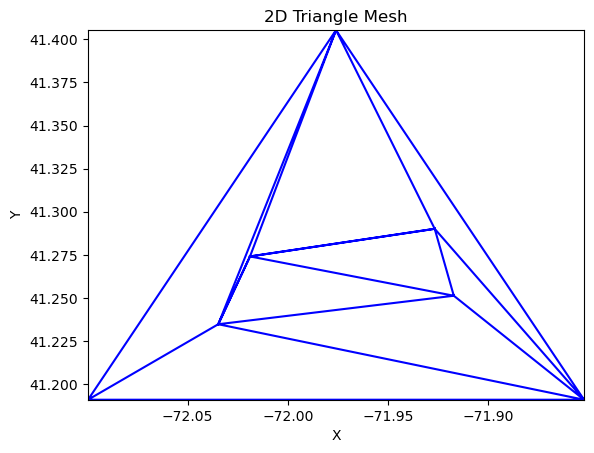

In [8]:
import numpy as np
# import trimesh

# # Load the mesh from the file
# mesh = trimesh.load_mesh('test11.off')

# print(mesh)

import matplotlib.pyplot as plt
# Load the mesh from the file
vertices = []
triangles = []

with open('test17.off', 'r') as f:
    lines = f.readlines()
    num_vertices, num_triangles, _ = map(int, lines[1].split())
    
    for line in lines[2:num_vertices+2]:
        x, y, _ = map(float, line.split())
        vertices.append([x, y])
    
    for line in lines[num_vertices+2:]:
        _, v1, v2, v3 = map(int, line.split())
        triangles.append([v1, v2, v3])

# Convert the vertices and triangles to numpy arrays
vertices = np.array(vertices)
triangles = np.array(triangles)

# Plot the mesh
fig, ax = plt.subplots()
ax.triplot(vertices[:, 0], vertices[:, 1], triangles=triangles, color='blue')

# Set the x-axis and y-axis limits
ax.set_xlim(vertices[:, 0].min(), vertices[:, 0].max())
ax.set_ylim(vertices[:, 1].min(), vertices[:, 1].max())

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Triangle Mesh')

# Show the plot
plt.show()
